## Linear Regression- One-layered
    
(based on a tutorial by Python Engineer in Youtube)

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
#data preparation
#model
#loss and optimizer
#training loop

In [17]:
#data preparation
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

print(X)
print('####')
print(y)
print('####')

y = y.view(y.shape[0],1)

print(y)

n_samples, n_features = X.shape

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [13]:
#model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [14]:
#loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [15]:
#training loop
num_epoch = 100

for epoch in range(num_epoch):
    #forwardpass
    y_pred = model(X)
    
    #loss
    loss = criterion(y_pred, y)
    
    #backwardpass
    loss.backward()
    
    #update
    optimizer.step()
    
    #empty grads
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch:{epoch+1}, loss={loss.item():.4f}')
        
    

epoch:10, loss=4422.6851
epoch:20, loss=3298.2903
epoch:30, loss=2484.9512
epoch:40, loss=1895.9775
epoch:50, loss=1469.0463
epoch:60, loss=1159.2870
epoch:70, loss=934.3483
epoch:80, loss=770.8743
epoch:90, loss=651.9835
epoch:100, loss=565.4586


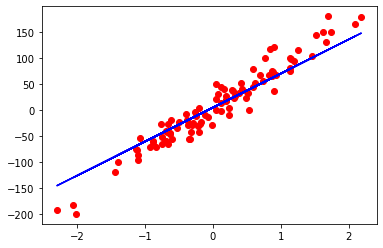

In [16]:
#plot
#detach >> not trackable with computational graph
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro') # as red dots
plt.plot(X_numpy, predicted, 'b')
plt.show()